# Pandas Basics

PANel DAta, R 구조체를 많이 차용하여 만듦. 

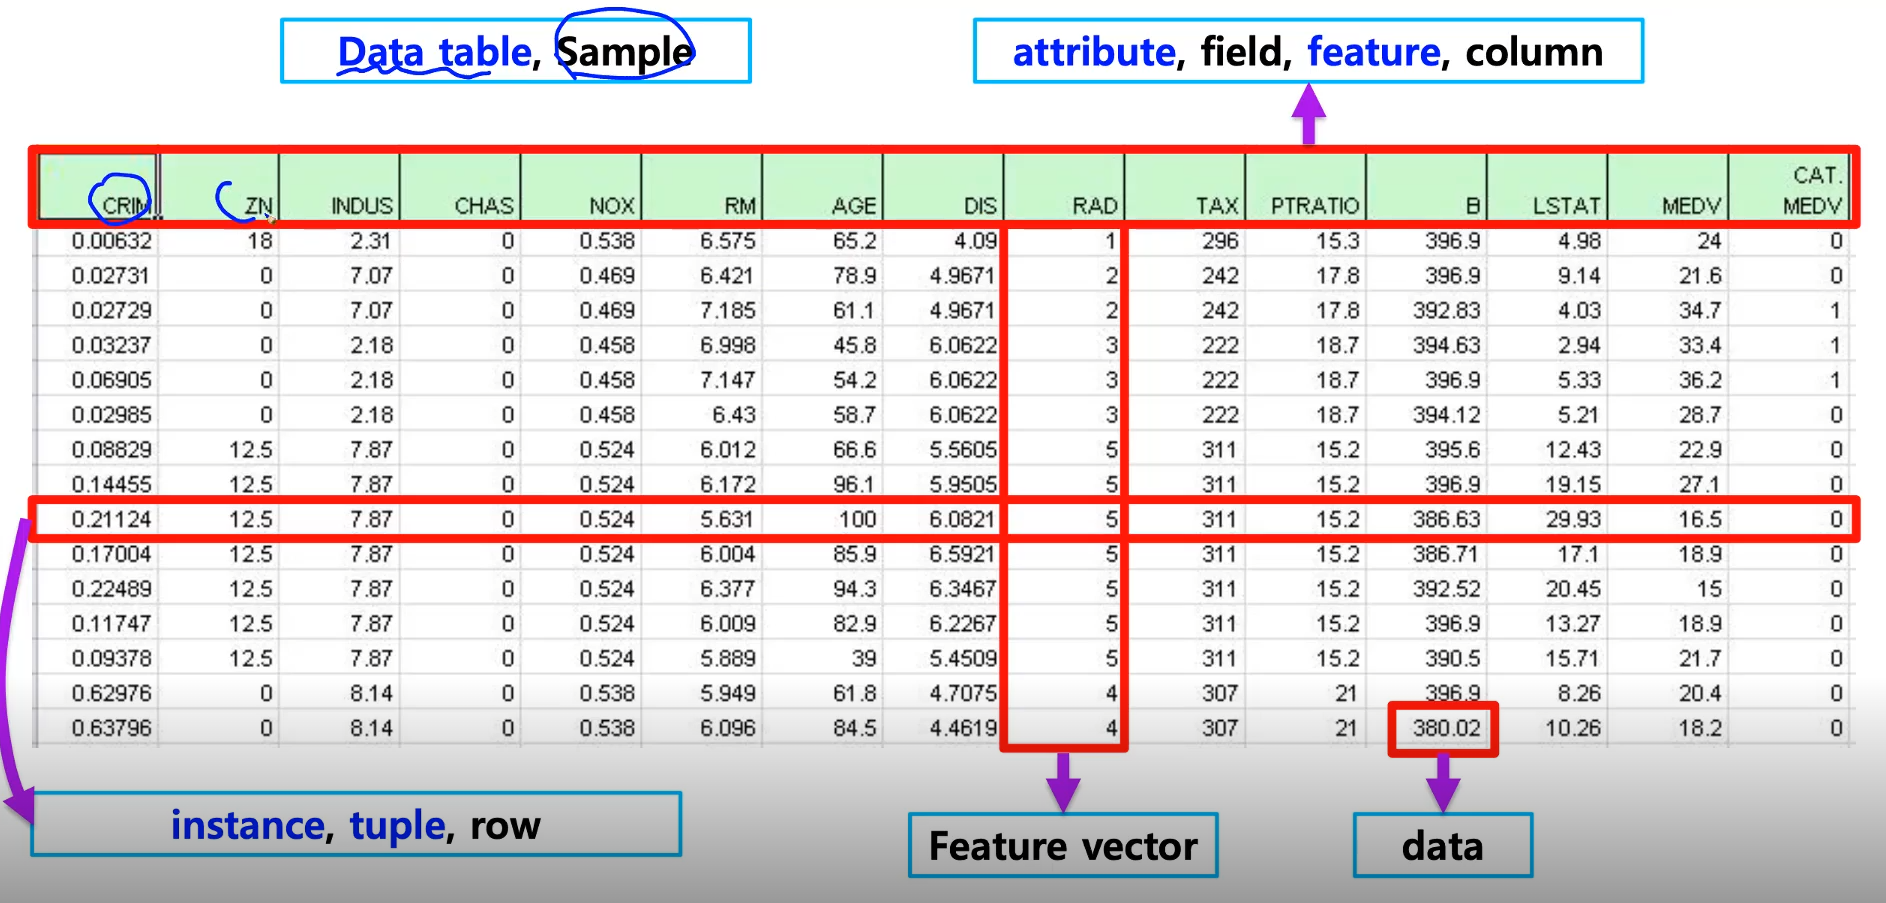

## 기본적인 method들 

대부분 생략하겠다. 

`df.values` 하면 tabular data numpy 형태로 나오니 이걸로 연산 가속하자. 

column 많으면 확인할 때 `df.T.head()`로 확인하면 간편하다. 

`map`을 `Series`에 적용 가능. `DataFrame`은 `apply`

In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.DataFrame(data=list(range(10)), columns=['foo'])
df

,foo
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [8]:
df.foo.map(lambda x: x+10)

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
Name: foo, dtype: int64

In [12]:
map_d = {
    1: 1000,
    2: 200
}

In [13]:
df.foo.map(map_d) # dictionary로 mapping 

0       NaN
1    1000.0
2     200.0
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: foo, dtype: float64

In [14]:
df.foo.replace(
    {
        1: 99, 
        2: 999
    }
) # dict 대신 list, list를 넣어줄 수도 있다. 

0      0
1     99
2    999
3      3
4      4
5      5
6      6
7      7
8      8
9      9
Name: foo, dtype: int64

In [9]:
df.apply(lambda x: x+10)

,foo
0,10
1,11
2,12
3,13
4,14
5,15
6,16
7,17
8,18
9,19


`applymap`은 series 단위가 아닌 element 단위로 함수를 적용한다. vector operation 되지 않는 연산에 대해 먹일 때 유용할 것이다. 

builtin function도 다양하게 제공된다. 

NaN인 것들 boolean indexing 할 때 numpy처럼 `foo_m[foo_m == 0]` 하는 것이 아니라 `foo_df[foo_df.isnull()]` 해줘야 함을 기억 

categorical value 들어가 있는 column 조사할 때 `foo_df.bar.unique()` 로 확인 가능


corr 구할 수 있다. 

#### 질문:

corr clustering은 어떻게 해야 할까? 

`pd.options.display.max_rows = 100`으로 max row display overriding 가능 

# Pandas Intermediate

## `groupby`

split --> apply --> combine

2개 이상의 column을 묶을 수도 있다. 이 때 hierarchical indexing이 된다. index가 두 개 이상 생성되는 것. 

`swaplevel()`로 hierarchy를 바꿀 수도 있다. 

`.sort_level(n)`, `sort_values()`로 정렬할 수 있다. 

이런 multi index를 `.unstack()` 하면 matrix로 풀어줄 수 있다. 

`groupby`를 하면 그룹된 상태가 되는데, 이 때 tuple 형태로 그룹의 key와 value를 받을 수 있다. 

key엔 group의 기준이 된 key가 말그대로 들어가고, value에는 그 key에 매칭되는 dataframe이 들어간다. 

특정 그룹만 얻기 위해선 `.get_group('foo')`를 통해 부른다. 

grouped 된 정보는 다음과 같은 `apply` 가 가능하다. 
- aggregation: 요약된 통계정보 추출. 각각 어떤 함수를 적용할 것인지 정할 수 있음. (mean, std, sum 등)
- transformation: 해당 정보 변환
- filtration: 특정 정보를 제거하여 보여줌 lambda 적용해서 만족시키는 것만 남김 (group된 상태에서 key아닌 다른 column으로 filter 가능)

#### 질문: 
aggregation vs transformation 차이가 뭔가? 



날짜 데이터 형식으로 바꾸는 방식으로 여러 가지 방법을 쓸 수 있다. 

`to_datetime()` 써도 되지만 `dateutil.parser.parse`도 있다. 

```python
import dateutil

df['date'] = df_phone.loc[:, 'date'].apply(
    dateutil.parser.parse, dayFirst=True
)
```

apply function by group을 할 떄 이와 같이 할 수 있다. 

In [2]:
import pandas as pd

In [28]:
df = pd.DataFrame(
    data = [
        ('a', 1, 3),
        ('a', 2, 5),
        ('a', 3, 3),
        ('a', 4, 4),
        ('a', 6, 1),
        ('a', 7, 4),
        ('b', 6, 3),
        ('b', 3, 2),
        ('b', 2, 3),
        ('b', 7, 4),
        ('b', 4, 5),
        ('b', 4, 5),
        ('b', 5, 5),
    ],
    columns = [
        'group',
        'value1', 
        'value2'
    ]
)

In [29]:
df

,group,value1,value2
0,a,1,3
1,a,2,5
2,a,3,3
3,a,4,4
4,a,6,1
5,a,7,4
6,b,6,3
7,b,3,2
8,b,2,3
9,b,7,4


In [30]:
# 이렇게 pivot 가능 

unstacked_df = df.groupby(['group', 'value2'])['value1'].count().unstack()
unstacked_df.T

group,a,b
value2,,
1,1.0,NaN
2,NaN,1.0
3,2.0,2.0
4,2.0,1.0
5,1.0,3.0


<AxesSubplot:xlabel='group'>

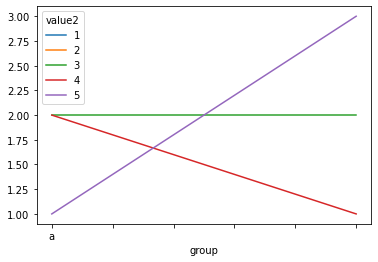

In [31]:
unstacked_df.plot()

In [32]:
df.groupby('group', as_index=False).agg({'value1': 'sum'})

,group,value1
0,a,23
1,b,31


## pivot

In [34]:
df.pivot_table(values='value1', index='value2', columns='group', aggfunc='count')

group,a,b
value2,,
1,1.0,NaN
2,NaN,1.0
3,2.0,2.0
4,2.0,1.0
5,1.0,3.0


`crosstab`으로도 비슷하게 할 수 있다. 

#### 질문

차이는 뭔가? 

## merge

`how=`를 left 해서 남기기 

## concat, append

(concat은 옆으로도 되지만) 밑으로 붙일 때 쓴다. 

## DB 연결

sqlite3를 기본적으로 쓸 수 있다. 